In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log_agent11.csv"
agent_results_df = pd.read_csv(csv_path)

In [3]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Scale the 'EffRatio' column by multiplying it by 3
agent_results_df['EffRatio'] = agent_results_df['EffRatio'] * 3
agent_results_df['Energy'] = agent_results_df['Energy']*-0.02

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffRatio,ValidHeadsRatio,Energy,Q_0,Q_1,Q_2,Q_3,...,Head_16,Head_17,Head_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,12,1.045781,0.613681,1.166351,0.824637,-1.377307,7688.046875,7666.750000,7723.406250,6847.593750,...,59.621881,59.626085,59.578802,0.85,0.9,21.029261,20.997342,7.748253,7.752103,11.338372
1,8,1.026884,0.458611,1.190980,0.689080,-1.421449,7337.421875,7357.234375,7457.375000,6693.703125,...,54.664276,54.668321,54.622834,0.80,1.2,18.146604,18.118130,6.738098,6.741412,21.328188
2,12,1.009120,0.704069,1.211917,0.828940,-1.336789,7708.625000,7522.468750,7522.750000,6125.046875,...,59.848292,59.852230,59.807960,0.85,0.9,20.428244,20.398001,7.470398,7.474157,11.068633
3,8,1.011388,0.501083,1.209265,0.694997,-1.403179,7356.000000,7373.859375,7474.625000,6705.156250,...,54.755490,54.759423,54.715207,0.80,1.2,17.923697,17.895867,6.638045,6.641329,21.060019
4,12,1.002695,0.718725,1.218862,0.829478,-1.329615,7716.984375,7530.046875,7530.609375,6130.546875,...,59.887780,59.891672,59.847918,0.85,0.9,20.322534,20.292582,7.420979,7.424722,11.019937


In [4]:
agent_results_df.shape

(23, 1972)

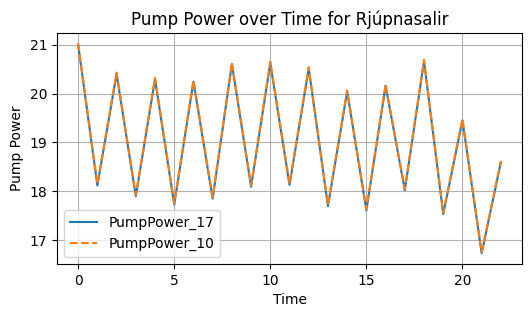

In [5]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


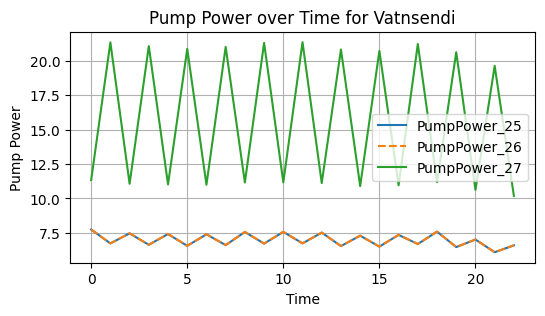

In [6]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


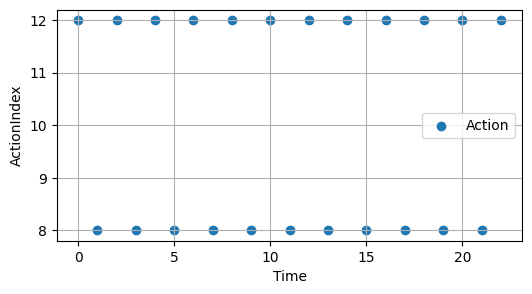

In [14]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

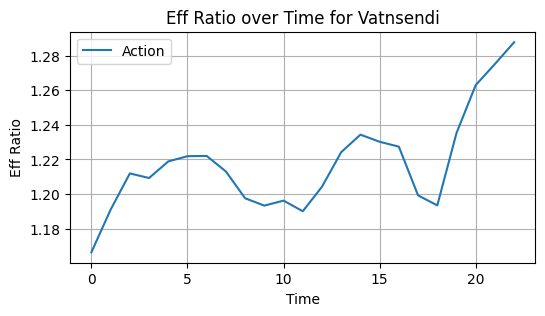

In [8]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffRatio'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


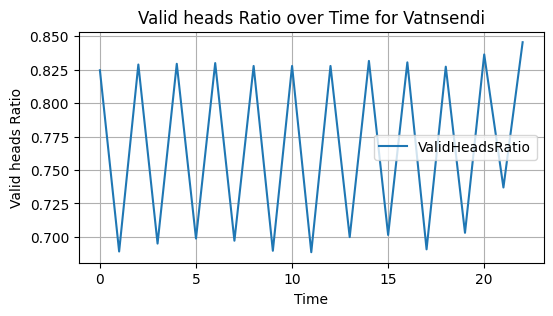

In [9]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['ValidHeadsRatio'], label='ValidHeadsRatio')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Valid heads Ratio")
plt.title("Valid heads Ratio over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


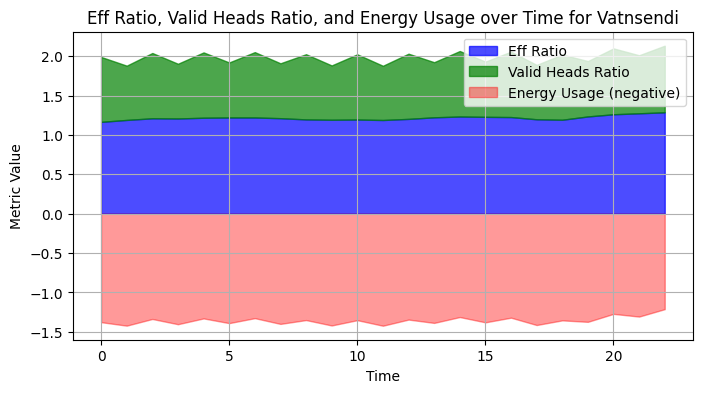

In [10]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffRatio'] + agent_results_df['ValidHeadsRatio']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffRatio'], label='Eff Ratio', color='blue', alpha=0.7)
plt.fill_between(agent_results_df.index, agent_results_df['EffRatio'], agent_results_df['Total'], label='Valid Heads Ratio', color='green', alpha=0.7)

# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


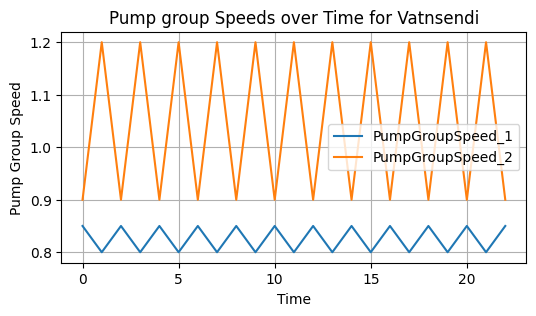

In [11]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [13]:
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.045780954728453
Step 1  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.02688357571276
Step 2  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0091200394380084
Step 3  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.0113877249198917
Step 4  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.002694930572673
Step 5  Group 1: 0.8,  Group 2: 1.2, Demand scale 0.9996713499301618
Step 6  Group 1: 0.85,  Group 2: 0.9, Demand scale 0.9996713499301618
Step 7  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.007986196697067
Step 8  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.021592309588366
Step 9  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.024993837811191
Step 10  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0227261523293074
Step 11  Group 1: 0.8,  Group 2: 1.2, Demand scale 1.0276394708733876
Step 12  Group 1: 0.85,  Group 2: 0.9, Demand scale 1.0159230958836578
Step 13  Group 1: 0.8,  Group 2: 1.2, Demand scale 0.9974036644482788
Step 14  Group 1: 0.85,  Group

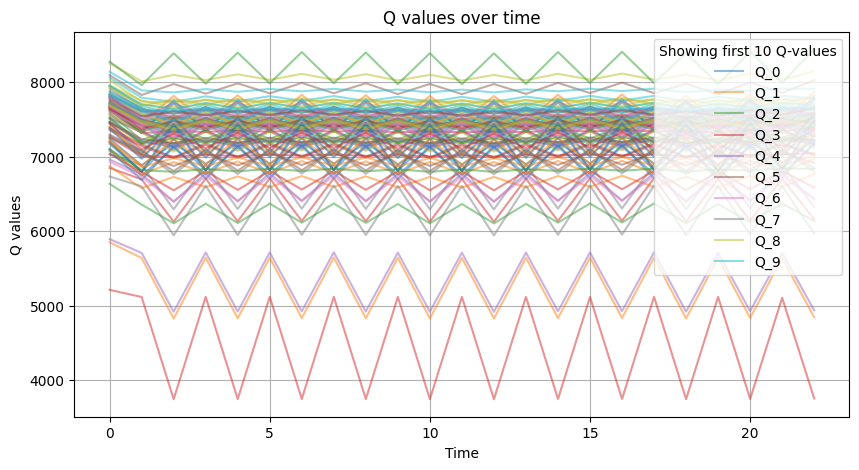

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(100):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)

# Display legend only for the first few to avoid clutter
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], loc='upper right', title='Showing first 10 Q-values')

# Show the plot
plt.show()
